In [1]:


import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



## Load Data from ATIS Dataset


In [2]:
import spacy
import csv

# Define a function to read CSV data
def read_data(path):
    with open(path, 'r') as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        labels = []
        sentences = []
        next(readCSV)  # Skip header row, if any
        for row in readCSV:
            label = row[0]
            sentence = row[1]
            labels.append(label)
            sentences.append(sentence)
    return sentences, labels

# Specify your data file path
data_file_path = 'data.csv'  # Replace with your actual file path

# Loading data
sentences, labels = read_data(data_file_path)

# Print some sample data to verify
print("Sample sentences:", sentences[:3], '\n')
print("Sample labels:", labels[:3])

# Split data into train and test sets if needed
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, labels_train, labels_test = train_test_split(sentences, labels, test_size=0.2, random_state=42)

print("\nTraining set size:", len(sentences_train))
print("Test set size:", len(sentences_test))


Sample sentences: ['Can you set an alarm for 7 AM?', 'Please wake me up at 6:30 in the morning.', 'Set an alarm for 5 minutes from now.'] 

Sample labels: ['Set Alarm', 'Set Alarm', 'Set Alarm']

Training set size: 247
Test set size: 62


## Spacy Setup

## Loading spaCy model

In [4]:
import spacy

# Load the large English model
nlp = spacy.load("en_core_web_lg")

# Test the model with a sample sentence
doc = nlp("This is a test sentence.")
print("Vector representation of 'test':", doc[3].vector)

Vector representation of 'test': [ 2.0747e+00  4.2498e+00  3.9225e+00  6.1980e+00  4.6034e+00  2.1605e+00
  5.9338e-01  4.6487e+00 -7.9070e+00 -1.4183e+00  6.2130e+00  1.6122e+00
 -3.8765e+00  4.5669e-01 -1.9283e+00  6.9949e+00  7.4237e+00 -1.1636e+00
 -1.1867e+00 -8.6391e+00 -6.2323e+00 -8.2422e-01 -4.4729e+00 -5.2772e-01
 -5.1022e+00 -2.1692e+00  8.4865e-01 -2.5185e+00  1.7174e-01  6.8852e+00
  4.8053e+00  1.8922e+00 -3.9032e+00  2.4455e+00  7.4008e+00 -3.8487e-01
  2.4496e+00  1.7708e+00  1.5639e+00 -1.8948e+00 -1.1454e+00  1.7113e+00
  7.9283e-02  7.7719e-01 -1.0368e+01 -1.6937e+00  9.7694e+00 -6.5259e+00
  5.9692e-01  3.9678e-01  3.1471e+00  4.5093e+00 -1.6639e+00 -3.8585e+00
 -3.3906e+00  1.0380e+00 -4.7367e+00 -7.0021e+00  2.4162e+00  3.2480e+00
 -1.2507e-01  2.4712e+00 -1.2896e+01  2.5621e+00  2.4321e+00  1.3416e+00
 -1.3868e+00 -4.9513e+00 -7.6641e+00  9.4528e+00  1.3158e+00  2.9392e+00
 -5.7965e+00  1.8009e+00  4.4403e+00  5.4881e+00  3.3052e+00 -4.0690e+00
 -5.5754e+00 -5.98

In [5]:
# Calculate the dimensionality of nlp
embedding_dim = nlp.vocab.vectors_length

print(embedding_dim)


300


# Encoding Sentences Using spaCy NLP Model


In [6]:

def encode_sentences(sentences):
    # Calculate number of sentences
    n_sentences = len(sentences)

    print('Length :-',n_sentences)

    X = np.zeros((n_sentences, embedding_dim))
    #y = np.zeros((n_sentences, embedding_dim))

    # Iterate over the sentences
    for idx, sentence in enumerate(sentences):
        # Pass each sentence to the nlp object to create a document
        doc = nlp(sentence)
        # Save the document's .vector attribute to the corresponding row in
        # X
        X[idx, :] = doc.vector
    return X

train_X = encode_sentences(sentences_train)
test_X = encode_sentences(sentences_test)


Length :- 247
Length :- 62


# Label Encoding

In [19]:
def label_encoding(labels):
    # Calculate the length of labels
    n_labels = len(labels)
    print('Number of labels :-', n_labels)

    # Import and instantiate LabelEncoder
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    y = le.fit_transform(labels)
    print(y[:100])
    print('Length of y :- ', y.shape)

    # Return both the encoded labels and the LabelEncoder object
    return y, le

# Get encoded labels and the LabelEncoder instance
train_y, le = label_encoding(labels_train)
test_y, _ = label_encoding(labels_test)  # No need for a second encoder for testing data



Number of labels :- 247
[13  1 10  0 16 27 18  2  9 22 29  8 11 14  2 18 18 16 23 16 18  4 26 12
  5  9 19 28 20 18 27 21  6 27 20 20 23  0 26  5 10  8 20  2  3 23  5  9
  5  8 29  3  0 13 20 28 26 18 17 15 14  3 13 14 16 24 21 19  7 25 21 17
  8 10 19 18  9 19  9  6  6 10 29  0 22  9  7 29 13 12 14 13 27 11 15 28
  1 21  4 17]
Length of y :-  (247,)
Number of labels :- 62
[ 6 22  2  5 11  5 26 29 10 25 27  4 21 24  6 21 22  3  4  4 27  1 17 16
 27 19  9  8 23 28  1 22 15 14 26  1 25 20  7 13 25 11 29 10 21  7 12 22
  6 27  9 10 18 15 29  0 24  7  7 25 12  3]
Length of y :-  (62,)


# EDA

In [9]:
df1 = pd.read_csv('data.csv', delimiter=',')
df1.dataframeName = 'data.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 309 rows and 3 columns


In [10]:
df1.sample(10)

,intent,question,Unnamed: 2
289,Send Money,Can you send $50 to my friend via Venmo?,NaN
67,Check Notifications,Have I received any alerts from my bank?,NaN
114,Check Wi-Fi,Is the Wi-Fi working properly right now?,NaN
3,Set Alarm,Remind me to call John at 2 PM.,NaN
101,Check Battery,How much battery do I have left?,NaN
261,Order Food,Can you place an order for Chinese food delivery?,NaN
270,Set Do Not Disturb,Please turn on Do Not Disturb for one hour.,NaN
207,Read News,Can you read me the local news from my city?,NaN
70,Take a Photo,Take a selfie.,NaN
58,Check Calendar,Can you check my calendar for an appointment t...,NaN


In [11]:
df1.describe()

,intent,question,Unnamed: 2
count,309,309,1
unique,30,309,1
top,Set Reminder,Can you set an alarm for 7 AM?,asking about the meeting schedule.
freq,20,1,1


Text(0, 0.5, 'Frequency')

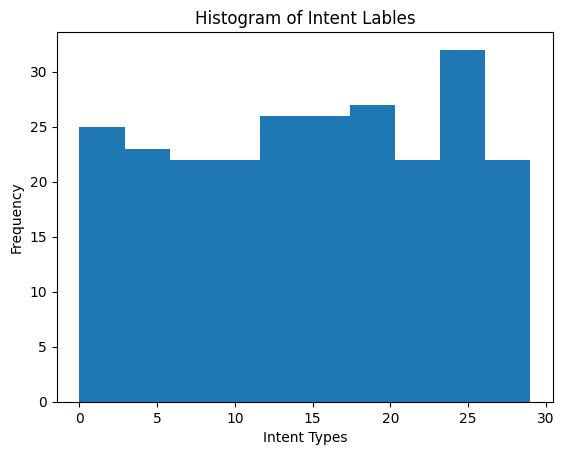

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(train_y)

# Add labels
plt.title('Histogram of Intent Lables')
plt.xlabel('Intent Types')
plt.ylabel('Frequency')
#df1['atis_flight'].hist()

## Intent classification with SVM | Training Step

In [13]:
# Import SVC
from sklearn.svm import SVC
# X_train and y_train was given.
def svc_training(X,y):
    # Create a support vector classifier
    clf = SVC(C=1)

    # Fit the classifier using the training data
    clf.fit(X, y)
    return clf

model = svc_training(train_X,train_y)


In [14]:
#Validation Step

def svc_validation(model,X,y):
    # Predict the labels of the test set
    y_pred = model.predict(X)

    # Count the number of correct predictions
    n_correct = 0
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            n_correct += 1

    print("Predicted {0} correctly out of {1} training examples".format(n_correct, len(y)))


svc_validation(model,train_X,train_y)
svc_validation(model,test_X,test_y)


Predicted 201 correctly out of 247 training examples
Predicted 33 correctly out of 62 training examples


In [15]:
from sklearn.metrics import classification_report
y_true, y_pred = test_y, model.predict(test_X)
print(classification_report(y_true, y_pred))



              precision    recall  f1-score   support

           0       0.17      1.00      0.29         1
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         3
           5       0.50      0.50      0.50         2
           6       1.00      0.33      0.50         3
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         2
          10       1.00      0.67      0.80         3
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       1.00      1.00      1.00         2
          16       0.25      1.00      0.40         1
          17       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
import numpy as np

def predict_intent(text, model, label_encoder):
    # Encode the text using spaCy
    doc = nlp(text)
    text_vector = doc.vector.reshape(1, -1)  # Reshape to make it compatible for prediction

    # Predict the label using the trained SVM model
    label_encoded = model.predict(text_vector)

    # Decode the label back to the original category name
    label_decoded = label_encoder.inverse_transform(label_encoded)

    return label_decoded[0]

In [22]:
text = "set an alarm for 3am"
predicted_intent = predict_intent(text, model, le)  # Pass `le` here for decoding
print("Predicted intent for '{}': {}".format(text, predicted_intent))

Predicted intent for 'set an alarm for 3am': Set Alarm
